In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

#load the statistical libraries
from scipy import stats

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
# from sklearn.preprocessing import OneHotEncoder
# from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, auc, roc_curve
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Data Preprocessing
Before data analysis, we need to filter the data based on the size of the ratings in each region. Because we want to ex
### BeerAdvoate rating

In [2]:
# Load ratings data from BeerAdvocate
df_rating_ba = pd.read_csv('after_pro_data_ba.csv')
df_rating_ba = df_rating_ba.drop(columns=['Unnamed: 0'])
print(f'Currently, there are {len(df_rating_ba)} ratings on BeerAdvocate website')
df_rating_ba.head()

Currently, there are 247982 ratings on BeerAdvocate website


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,3.50,4.00,4.00,4.5,3.98,Serving,True
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,4.00,4.00,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True


In [3]:
# Load user data from BeerAdvocate
df_user_ba = pd.read_csv('BeerAdvocate/users.csv')
df_user_ba.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [4]:
# Load beer data from BeerAdvocate
df_beer_ba = pd.read_csv('BeerAdvocate/beers.csv')
df_beer_ba.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [5]:
# Load brewery data from BeerAdvocate
df_brewery_ba = pd.read_csv('BeerAdvocate/breweries.csv')
df_brewery_ba.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [6]:
df_user_ba.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [7]:
# Merge data based on user id in order to get users' location
# user_region = df_user_ba[['user_id', 'location']]
region_ba = pd.merge(df_rating_ba, df_user_ba, how="left", left_on='user_id', right_on='user_id')

In [8]:
region_ba.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name_x,user_id,appearance,...,taste,overall,rating,text,review,nbr_ratings,nbr_reviews,user_name_y,joined,location
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,...,2.75,3.0,2.88,"From a bottle, pours a piss yellow color with ...",True,7820,465,nmann08,1.199704e+09,"United States, Washington"
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,...,4.00,3.5,3.67,Pours pale copper with a thin head that quickl...,True,2521,2504,StJamesGate,1.191838e+09,"United States, New York"
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,...,4.00,3.5,3.73,"500ml Bottle bought from The Vintage, Antrim.....",True,1797,1143,mdagnew,1.116410e+09,Northern Ireland
3,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1101898800,helloloser12345,helloloser12345.10867,4.00,...,4.00,4.5,3.98,Serving,True,31,31,helloloser12345,1.101380e+09,Northern Ireland
4,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1093860000,cypressbob,cypressbob.3708,4.00,...,4.00,4.0,4.00,"500ml bottlePours with a light, slightly hazy ...",True,604,604,cypressbob,1.069326e+09,Northern Ireland


In [9]:
region_agg = region_ba[['location', 'beer_id']].groupby('location').agg('count')
region_agg = pd.DataFrame(region_agg.to_records())
region_agg.rename(columns={'beer_id':'count'}, inplace=True)
region_agg = region_agg.sort_values(by=['count'], ascending=False)
region_agg.reset_index(inplace=True, drop=True)
# Print top 20 region
region_agg.head(20)

,location,count
0,England,19432
1,Canada,18033
2,"United States, California",14748
3,"United States, Pennsylvania",12864
4,"United States, New York",12222
5,"United States, Texas",9476
6,"United States, Illinois",9400
7,"United States, Massachusetts",8422
8,"United States, Ohio",7229
9,"United States, Florida",6371


### RateBeer rating

In [10]:
df_rating_rb = pd.read_csv('after_pro_data_rb.csv')
df_rating_rb = df_rating_rb.drop(columns=['Unnamed: 0'])
print(f'Currently, there are {len(df_rating_rb)} ratings on RateBeer website')
df_rating_rb.head()

Currently, there are 396690 ratings on RateBeer website


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...


In [11]:
df_brewery_rb = pd.read_csv('RateBeer/breweries.csv')
df_brewery_rb.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [12]:
df_beer_rb = pd.read_csv('RateBeer/beers.csv')
df_beer_rb.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [13]:
df_user_rb = pd.read_csv('RateBeer/users.csv')
df_user_rb.head()

,nbr_ratings,user_id,user_name,joined,location
0,1890,175852,Manslow,1.337508e+09,Poland
1,89,442761,MAGICuenca91,1.484046e+09,Spain
2,169,288889,Sibarh,1.384600e+09,Poland
3,3371,250510,fombe89,1.363950e+09,Spain
4,13043,122778,kevnic2008,1.296644e+09,Germany


In [14]:
# Merge data based on user id in order to get users' location
region_rb = pd.merge(df_rating_rb, df_user_rb, how="left", left_on='user_id', right_on='user_id')
region_rb.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name_x,user_id,appearance,aroma,palate,taste,overall,rating,text,nbr_ratings,user_name_y,joined,location
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło...",1890,Manslow,1.337508e+09,Poland
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...,89,MAGICuenca91,1.484046e+09,Spain
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni...",169,Sibarh,1.384600e+09,Poland
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C...",3371,fombe89,1.363950e+09,Spain
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...,13043,kevnic2008,1.296644e+09,Germany


In [15]:
# original_column = ['beer_name_x', 'beer_id_x', 'brewery_name_x', 'brewery_id_x', 'style_x',
#           'abv_x', 'date_x', 'user_name_x_x', 'user_id', 'appearance_x',
#           'aroma_x', 'palate_x', 'taste_x', 'overall_x', 'rating_x', 'text_x',
#           'review', 'nbr_ratings_x', 'nbr_reviews', 'user_name_y_x', 'joined_x',
#           'location_x', 'beer_name_y', 'beer_id_y', 'brewery_name_y',
#           'brewery_id_y', 'style_y', 'abv_y', 'date_y', 'user_name_x_y',
#           'appearance_y', 'aroma_y', 'palate_y', 'taste_y', 'overall_y',
#           'rating_y', 'text_y', 'nbr_ratings_y', 'user_name_y_y', 'joined_y',
#           'location_y']
# ordered_column = ['user_id', 'user_name_x_x', 'user_name_y_y', 'brewery_name_x', 'brewery_id_x', 'brewery_name_y',
#                  'brewery_id_y', 'style_x', 'abv_x', 'date_x', 'style_y', 'abv_y', 'date_y', 'appearance_x',
#                  'aroma_x', 'palate_x', 'taste_x', 'overall_x', 'rating_x', 'text_x', 'review', 'nbr_ratings_x', 'nbr_reviews',
#                  'appearance_y', 'aroma_y', 'palate_y', 'taste_y', 'overall_y', 'rating_y', 'text_y', 'nbr_ratings_y',
#                  'joined_x', 'location_x', 'joined_y', 'location_y']

## Data Analysis
### Rating Distribution

### BeerAdvocate

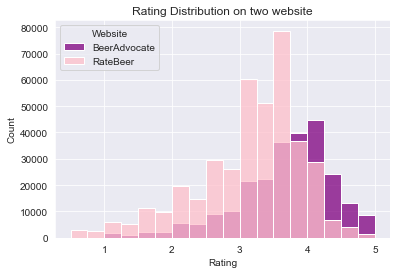

In [16]:
#creating subplots
ax=plt.subplots()

#plotting columns
ax=sns.histplot(data=df_rating_ba, x='rating', color = 'purple', binwidth=0.25, label='x')
ax=sns.histplot(data=df_rating_rb, x='rating', color = 'pink', binwidth=0.25)

# setting figure legend
plt.legend(title='Website', loc='upper left', labels=['BeerAdvocate', 'RateBeer'])

#renaming the axes
ax.set(xlabel="Rating", ylabel="Count")

# setting figute title
ax.set_title("Rating Distribution on two website")

# visualizing illustration
plt.show()

Add explanation

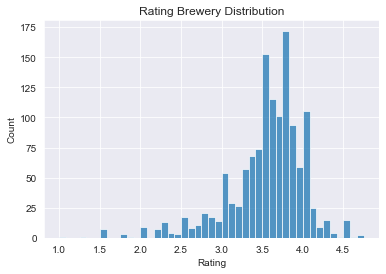

In [17]:
# explore ratings on each brewery
rating_brewery = pd.merge(df_rating_ba, df_brewery_ba, how='left', left_on='brewery_id', right_on='id')
rating_brewery = rating_brewery[['overall', 'brewery_name']]
mean_rating_brewery = rating_brewery.groupby('brewery_name').mean()
mean_rating_brewery = pd.DataFrame(mean_rating_brewery.to_records())

# draw rating brewery distribution
sns.histplot(data=mean_rating_brewery, x='overall')
plt.xlabel('Rating')
plt.title('Rating Brewery Distribution')
plt.show()

add description

### RateBeer

In [18]:
df_rating_rb.head()

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,33 Export (Gabon),410549,Sobraga,3198,Pale Lager,5.0,1461664800,Manslow,175852,2,4,2,4,8,2.0,"Puszka 0,33l dzięki Christoph . Kolor jasnozło..."
1,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1487329200,MAGICuenca91,442761,2,3,2,4,8,1.9,Cerveza pale lager gabonesa. MÃ¡s floja que la...
2,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1466762400,Sibarh,288889,3,3,2,3,5,1.6,"Kolor- złoty, klarowny. Piana - drobna, średni..."
3,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1451646000,fombe89,250510,4,3,1,2,5,1.5,"Botella, de GabÃ³n regalo familiar.31/01/2015C..."
4,Castel Beer (Gabon),105273,Sobraga,3198,Pale Lager,5.2,1445594400,kevnic2008,122778,2,4,2,4,7,1.9,Many thanks for this beer to Erzengel. Pours l...


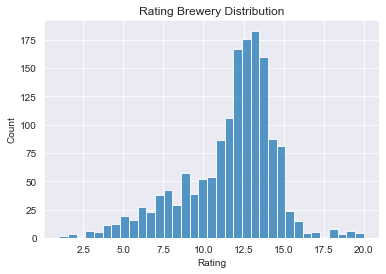

In [19]:
# explore ratings on each brewery
rating_brewery_rb = pd.merge(df_rating_rb, df_brewery_rb, how='left', left_on='brewery_id', right_on='id')
rating_brewery_rb = rating_brewery_rb[['overall', 'brewery_name']]
mean_rating_brewery_rb = rating_brewery_rb.groupby('brewery_name').mean()
mean_rating_brewery_rb = pd.DataFrame(mean_rating_brewery_rb.to_records())

# draw rating brewery distribution
sns.histplot(data=mean_rating_brewery_rb, x='overall')
plt.xlabel('Rating')
plt.title('Rating Brewery Distribution')
plt.show()

## ABV raking

The average abv% of beers from BeerAdvocate is 5.9221810481068085%.


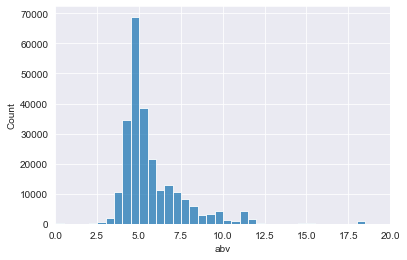

In [20]:
avg_ba_abv = region_ba.abv.mean()
avg_ba_abv
print(f'The average abv% of beers from BeerAdvocate is {avg_ba_abv}%.')
fig, ax = plt.subplots()
ax.set_xlim(0, 20)
sns.histplot(region_ba.abv, binwidth=0.5, ax=ax)
plt.show()

##### Find the popular beers in top 10 greatest regions in each year(interactive)

In [21]:
print(region_ba.columns)

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name_x', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review', 'nbr_ratings',
       'nbr_reviews', 'user_name_y', 'joined', 'location'],
      dtype='object')


In [22]:
region_ba_style_change = region_ba[['date', 'location', 'beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'overall', 'nbr_ratings', 'nbr_reviews', 'text', 'style']]

In [23]:
import datetime

In [24]:
region_ba_style_change['formal_date'] = region_ba_style_change.date.apply(lambda x: datetime.datetime.fromtimestamp(x))

/var/folders/xr/dbxcvdh15j9fxwy531k32mp00000gn/T/ipykernel_53551/240012875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_ba_style_change['formal_date'] = region_ba_style_change.date.apply(lambda x: datetime.datetime.fromtimestamp(x))


In [25]:
region_ba_style_change = region_ba_style_change[['formal_date', 'date', 'location', 'beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'overall', 'nbr_ratings', 'nbr_reviews', 'text', 'style']]

In [26]:
region_ba_style_change.formal_date.describe(datetime_is_numeric=True)

count                           247982
mean     2012-07-09 13:00:16.172141568
min                1998-01-22 12:00:00
25%                2010-12-22 12:00:00
50%                2013-06-05 12:00:00
75%                2014-11-17 12:00:00
max                2017-07-25 12:00:00
Name: formal_date, dtype: object

In [27]:
type(region_ba_style_change.formal_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [28]:
region_ba_style_change.sort_values('formal_date', inplace=True)
region_ba_style_change['year'] = region_ba_style_change.formal_date.apply(lambda x: x.year)
region_list = region_agg.location.to_list()
year_list = region_ba_style_change.year.unique()
region_list = region_list[:10]

In [29]:
from ipywidgets import interact

In [30]:
# def plot_interactive(region, year):
#     data_to_plot = region_ba_style_change[(region_ba_style_change.location==region_list[region]) & (region_ba_style_change.year==year_list[year])][['brewery_name', 'style', 'beer_name','overall']]
#     data_to_plot = data_to_plot.groupby('style').mean().reset_index()
#     data_to_plot = data_to_plot.sort_values('overall', ascending=False).head(10)
#     sns.barplot(y='style', x='overall', data=data_to_plot, palette="magma")
#     plt.title(f'10 beer styles in {region_list[region]} that are the most popular in year {year_list[year]}.')
#     plt.xlabel('Overall score')
#     plt.ylabel('Beer style')
#     plt.show()
#
# interact(plot_interactive, region=(0, len(region_list)-1, 1), year=(5, len(year_list)-1, 1))
# # There are enough data from year 2003

In [31]:
print(year_list)

[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]


In [32]:
# !pip install jupyternotify

In [33]:
from IPython.display import HTML,Javascript, display

def popup(text):
    display(HTML("<script>alert('{}');</script>".format(text)))


In [34]:
def plot_interactive(region, year):
    data_to_plot = region_ba_style_change[(region_ba_style_change.location==region) & (region_ba_style_change.year==year)][['brewery_name', 'style', 'beer_name','overall']]
    data_to_plot = data_to_plot.groupby('style').mean().reset_index()
    data_to_plot = data_to_plot.sort_values('overall', ascending=False).head(10)
    if len(data_to_plot) > 0:
        sns.barplot(y='style', x='overall', data=data_to_plot, palette="magma")
        plt.title(f'10 beer styles in {region} that are the most popular in year {year}.')
        plt.xlabel('Overall score')
        plt.ylabel('Beer style')
        plt.show()
    else:
        popup(f"Insufficient data for {region} in {year}.")
        

interact(plot_interactive, region=region_list, year=year_list[:])
# There are enough data from year 2003

interactive(children=(Dropdown(description='region', options=('England', 'Canada', 'United States, California'…

<function __main__.plot_interactive(region, year)>

In [36]:
print(region_rb.columns)

Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name_x', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'nbr_ratings', 'user_name_y',
       'joined', 'location'],
      dtype='object')


In [43]:
region_rb_style_change = region_rb[['date', 'location', 'beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'overall', 'nbr_ratings', 'text', 'style']]

In [44]:
region_rb_style_change['formal_date'] = region_rb_style_change.date.apply(lambda x: datetime.datetime.fromtimestamp(x))

/var/folders/xr/dbxcvdh15j9fxwy531k32mp00000gn/T/ipykernel_53551/1781451564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_rb_style_change['formal_date'] = region_rb_style_change.date.apply(lambda x: datetime.datetime.fromtimestamp(x))


In [45]:
region_rb_style_change = region_rb_style_change[['formal_date', 'date', 'location', 'beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'overall', 'nbr_ratings', 'text', 'style']]

In [46]:
region_rb_style_change.formal_date.describe(datetime_is_numeric=True)

count                           396854
mean     2012-02-17 21:58:20.106336768
min                2000-04-26 12:00:00
25%                2009-03-11 12:00:00
50%                2013-03-09 12:00:00
75%                2015-07-04 12:00:00
max                2017-07-25 12:00:00
Name: formal_date, dtype: object

In [47]:
type(region_rb_style_change.formal_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [48]:
region_rb_style_change.location.head()

0     Poland
1      Spain
2     Poland
3      Spain
4    Germany
Name: location, dtype: object

In [49]:
region_rb_style_change.sort_values('formal_date', inplace=True)
region_rb_style_change['year'] = region_rb_style_change.formal_date.apply(lambda x: x.year)
region_list = region_agg.location.to_list()
year_list = region_rb_style_change.year.unique()
region_list = region_list[:10]

In [50]:
def popup(text):
    display(HTML("<script>alert('{}');</script>".format(text)))

In [51]:
def plot_interactive(region, year):
    data_to_plot = region_rb_style_change[(region_rb_style_change.location==region) & (region_rb_style_change.year==year)][['brewery_name', 'style', 'beer_name','overall']]
    data_to_plot = data_to_plot.groupby('style').mean().reset_index()
    data_to_plot = data_to_plot.sort_values('overall', ascending=False).head(10)
    if len(data_to_plot) > 0:
        sns.barplot(y='style', x='overall', data=data_to_plot, palette="magma")
        plt.title(f'10 beer styles in {region} that are the most popular in year {year}.')
        plt.xlabel('Overall score')
        plt.ylabel('Beer style')
        plt.show()
    else:
        popup(f"Insufficient data for {region} in {year}.")


interact(plot_interactive, region=region_list, year=year_list[:])
# There are enough data from year 2003

interactive(children=(Dropdown(description='region', options=('England', 'Canada', 'United States, California'…

<function __main__.plot_interactive(region, year)>

In [59]:
region_ba_style_change.head()

,formal_date,date,location,beer_id,beer_name,brewery_id,brewery_name,overall,nbr_ratings,nbr_reviews,text,style,year
56629,1998-01-22 12:00:00,885466800,"United States, Massachusetts",306,Casey's Smooth Stout,138,Shepherd Neame Ltd,1.0,1888,1887,Presentation,Irish Dry Stout,1998
57510,1998-02-21 12:00:00,888058800,"United States, Massachusetts",305,Spitfire (Premium Ale Export),138,Shepherd Neame Ltd,4.0,1888,1887,Presentation,English Pale Ale,1998
147358,1998-03-03 12:00:00,888922800,"United States, California",19,Mackeson Triple XXX Stout,9,Whitbread PLC,4.0,1699,1085,Presentation,Milk / Sweet Stout,1998
33435,1998-03-24 12:00:00,890737200,"United States, Massachusetts",79,Wee Heavy,148,Belhaven Brewery Company Ltd.,4.5,1888,1887,Presentation,Scotch Ale / Wee Heavy,1998
57052,1998-04-09 12:00:00,892116000,"United States, Massachusetts",304,Original Porter,138,Shepherd Neame Ltd,4.0,1888,1887,Presentation,American Porter,1998


In [104]:
beer_style_list = region_ba_style_change['style'].groupby(region_ba_style_change['style']).agg('count')
beer_style_list.sort_values(ascending=False)
beer_style_list = np.array(beer_style_list.index.to_list())

In [105]:
def plot_year_vs_no_ratings_interactive(style):
    specific_style = style
    specific_style_region_by = region_ba_style_change[region_ba_style_change['style']==specific_style]
    specific_style_region_by = specific_style_region_by.dropna(how='any')
    specific_style_region_by = specific_style_region_by.drop_duplicates('year')
    sns.lineplot(data=specific_style_region_by, x='year', y='nbr_ratings')
    plt.title(f'The number of ratings of {style}')
    plt.xlabel('Year')
    plt.ylabel('Number of ratings')
    plt.show()

interact(plot_year_vs_no_ratings_interactive, style=beer_style_list)

interactive(children=(Dropdown(description='style', options=('Altbier', 'American Adjunct Lager', 'American Am…

<function __main__.plot_year_vs_no_ratings_interactive(style)>

,formal_date,date,location,beer_id,beer_name,brewery_id,brewery_name,overall,nbr_ratings,nbr_reviews,text,style,year
23588,2005-04-24 12:00:00,1114336800,"United States, Virginia",23328,Red Alt Ale,3407,"Clockwork Beer Co, The",4.00,98,98,Pours a rusty orange with a bubbly off-white h...,Altbier,2005
200878,2007-08-03 12:00:00,1186135200,"United States, California",22537,Alt Bier,8270,Brewerkz - Riverside Point,3.50,209,209,The Alt Bier was strongly malty and hoppy but ...,Altbier,2007
23587,2008-04-06 12:00:00,1207476000,Scotland,23328,Red Alt Ale,3407,"Clockwork Beer Co, The",4.00,179,179,This was the only beer from their own collecti...,Altbier,2008
220843,2009-03-09 12:00:00,1236596400,Mexico,46122,Tempus Clasica,18412,Cerveceria Primus,4.00,221,221,"With an amber coppery color; medium body, very...",Altbier,2009
220870,2010-06-28 12:00:00,1277719200,Mexico,46123,Tempus Doble Malta,18412,Cerveceria Primus,4.50,4,4,"Bought as a bottle, served in a long glass (as...",Altbier,2010
244224,2011-05-03 12:00:00,1304416800,Canada,68625,Düssel-Port Altbier,17272,The Port Gastropub / Sea Level Brewing Company,3.50,138,138,"A- A heavy, dense orange color. Almost no head...",Altbier,2011
1855,2012-03-10 12:00:00,1331377200,England,79274,Altbeer,22896,Artisan Brewing Co.,4.00,1420,638,Poured from a 500ml bottle (labelled as 660ml)...,Altbier,2012
57069,2013-10-21 12:00:00,1382349600,England,102878,Shepherd Neame / Terrapin Tree Hugger,138,Shepherd Neame Ltd,3.50,3050,3050,Official blurb first.Cask; special for Wethers...,Altbier,2013
207855,2015-01-22 12:00:00,1421924400,"United States, Pennsylvania",113662,Berber Cerveza Amber (Vienna Style Amber Ale),32856,Cerveceria Berber S.A. de C.V.,3.00,4526,4526,This has been on The CANQuest's want list for ...,Altbier,2015
39469,2016-02-15 12:00:00,1455534000,Ukraine,194163,Candy Kaiser,16315,BrewDog,4.25,216,63,"A pleasant, full-bodied, hoppy taste with ligh...",Altbier,2016
